In [1]:
import gensim
import numpy as np
import pandas as pd

import random

from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

D:\Programming\Anaconda3\lib\site-packages\gensim\utils.py:1167: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
song2vec = gensim.models.Word2Vec.load("song2vec.model")

In [3]:
song_list = list(song2vec.wv.vocab.keys())

In [34]:
song2vec.most_similar()

D:\Programming\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


[('揪心的玩笑與漫長的白日夢', 0.9624101519584656),
 ('秦皇島', 0.9463797807693481),
 ('大石碎胸口', 0.944685697555542),
 ('洋鳥消夏錄', 0.9434249401092529),
 ('不萬能的喜劇', 0.9403315186500549),
 ('在這顆行星所有的酒館', 0.9287142753601074),
 ('那些事情我都不在乎', 0.9056763648986816),
 ('狗尿館', 0.9055609107017517),
 ('明天開始', 0.9042739868164062),
 ('I want to waste time with you', 0.8886508941650391)]

In [21]:
len(song_list)

78141

In [20]:
len(song2vec.wv.vectors)

78141

In [19]:
import pickle
with open("artist2vec.txt", "rb") as f:
    art2vec = pickle.load(f)

In [20]:
art = list(art2vec.keys())

In [64]:
artist_index = []
for i in ["周杰倫 (Jay Chou)", "林俊傑 (JJ Lin)", "草東沒有派對 (No Party For Cao Dong)", "宋冬野 (Dongye Song)", "Lady Gaga", "Joe Hisaishi (久石譲)",
          "Coldplay", "GALA", "汪峰", "Ed Sheeran"]:
    artist_index.append(art.index(i))
artist_index


[5684, 17682, 21137, 7757, 16885, 5420, 21442, 22735, 13206, 6490]

In [69]:
names = ["Jay Chou", "JJ Lin", "No Party For Cao Dong", "Dongye Song", "Lady Gaga", "Joe Hisaishi", "Coldplay", "GALA", "Feng Wang", "Ed Sheeran"]

In [23]:
art_vec = list(art2vec.values())

In [66]:
vis_vectors = []
for index in artist_index:
    vis_vectors.append(art_vec[index])
for i in range(3000):
    index = random.randint(0, len(art))
    if index not in artist_index:
        vis_vectors.append(art_vec[index])

In [61]:
len(vis_vectors)

3008

In [22]:
import random
random.randint(0, 100)

56

In [67]:
tsne = TSNE(n_components=2, perplexity=5, random_state=666)
Y = tsne.fit_transform(vis_vectors)
x_coords = Y[:, 0]
y_coords = Y[:, 1]

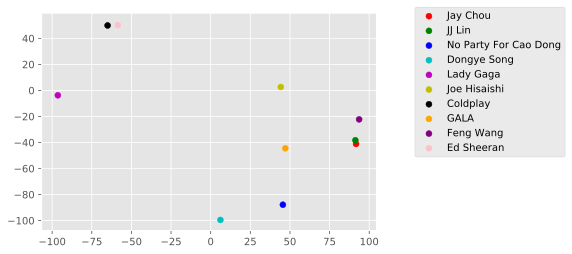

In [70]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']

for i in range(len(artist_index)):
    plt.scatter(x_coords[i], y_coords[i], label=names[i], c=colors[i])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()